# 0. Introdução<bR>

A inferência estatística é um ramo da estatística que se dedica a tirar conclusões sobre uma população a partir de uma amostra. Em outras palavras, é o processo de usar os dados coletados de uma amostra menor para fazer generalizações ou previsões sobre uma população maior.

<br>

O desafio proposto trata sobre o transtorno depressivo, um problema multifatorial que pode ter várias possíveis combinações de situações como causa.

<br>

Os dados disponíveis são resultados da NHNES (National Health and Nutrition Examination Survey), realizada anualmente nos EUA para avaliar a saúde e nutrição de adultos e crianças;

<br>

Perguntas sugeridas:
    
<br>

1- Qual o perfil de individuos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no periodo entre 2005-2006

<br>

2- Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população? 


# 1. Carregando Bibliotecas

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


# 2. Carregando Conjunto de Dados

In [46]:
df_demo=pd.read_csv('DEMO_PHQ.csv')
df_pag=pd.read_csv('PAG_HEI.csv')

df_pag.head()


,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [47]:
df_demo.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


# 3. Transformações nos Dados

##### Juntando os dois conjuntos de dados tendo como coluna comum a SEQN "Identificador único do respondente"


In [48]:
df=pd.merge(df_demo,df_pag,on='SEQN',how='left')
print(df.shape)
df.head()

(5334, 31)


,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


In [49]:
#Uma pequena função para visualizar melhor os dados faltantes

def visualizar_faltantes(valor):
    
    print(f'Quantidade percentual de dados faltantes:')
    return (round(valor.isnull().sum()/valor.shape[0],4)*100).astype(str)+"%"

visualizar_faltantes(df)

Quantidade percentual de dados faltantes:


SEQN                                      0.0%
DPQ010                                   9.34%
DPQ020                                   9.34%
DPQ030                                   9.34%
DPQ040                                   9.34%
DPQ050                                   9.34%
DPQ060                                   9.34%
DPQ070                                   9.34%
DPQ080                                   9.34%
DPQ090                                   9.34%
RIAGENDR                                  0.0%
RIDAGEYR                                  0.0%
RIDRETH1                                  0.0%
DMDEDUC                                   0.0%
INDFMINC                                 0.88%
PAG_MINW                                  0.0%
ADHERENCE                                 0.0%
HEI2015C1_TOTALVEG          5.140000000000001%
HEI2015C2_GREEN_AND_BEAN    5.140000000000001%
HEI2015C3_TOTALFRUIT        5.140000000000001%
HEI2015C4_WHOLEFRUIT        5.140000000000001%
HEI2015C5_WHO

#### Como existe uma porcentagem baixade valores faltantes, escolhi por remove-los.

In [50]:
df.dropna(inplace=True)
print(df.shape)
visualizar_faltantes(df)

(4702, 31)
Quantidade percentual de dados faltantes:


SEQN                        0.0%
DPQ010                      0.0%
DPQ020                      0.0%
DPQ030                      0.0%
DPQ040                      0.0%
DPQ050                      0.0%
DPQ060                      0.0%
DPQ070                      0.0%
DPQ080                      0.0%
DPQ090                      0.0%
RIAGENDR                    0.0%
RIDAGEYR                    0.0%
RIDRETH1                    0.0%
DMDEDUC                     0.0%
INDFMINC                    0.0%
PAG_MINW                    0.0%
ADHERENCE                   0.0%
HEI2015C1_TOTALVEG          0.0%
HEI2015C2_GREEN_AND_BEAN    0.0%
HEI2015C3_TOTALFRUIT        0.0%
HEI2015C4_WHOLEFRUIT        0.0%
HEI2015C5_WHOLEGRAIN        0.0%
HEI2015C6_TOTALDAIRY        0.0%
HEI2015C7_TOTPROT           0.0%
HEI2015C8_SEAPLANT_PROT     0.0%
HEI2015C9_FATTYACID         0.0%
HEI2015C10_SODIUM           0.0%
HEI2015C11_REFINEDGRAIN     0.0%
HEI2015C12_SFAT             0.0%
HEI2015C13_ADDSUG           0.0%
HEI2015_TO

In [51]:
df.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE'],
      dtype='object')

#### O proprio criador do dataset sugere a criação de uma nova variavel que é a soma dos questionarios feitos "DPQ010 até DPQ090" e depois uma realização de um diagnostico baseado no valor dessa soma chamado de vrl_phq

<br>

#### Neste DataFrame os valores "7 = Se recusou a responder" e "9 = Não sabe" devem ser substituidos por NaN, ja que iremos realizar a soma dos questionario afim de fazer os "diagnoticos" 


In [52]:
vrl_phq=df[['DPQ010', 'DPQ020',
       'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']]
vrl_phq

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5329,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5330,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0
5331,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
vrl_phq = vrl_phq.replace([7, 9], np.nan)
for coluna in vrl_phq.columns:
    print(f"{coluna}: {vrl_phq[coluna].unique()}")
df['phq_score']=vrl_phq.sum(axis=1)

DPQ010: [ 0.  1.  2.  3. nan]
DPQ020: [ 0.  1.  2.  3. nan]
DPQ030: [ 0.  1.  2. nan  3.]
DPQ040: [ 0.  1.  2. nan  3.]
DPQ050: [ 0.  3.  1.  2. nan]
DPQ060: [ 0.  1.  2.  3. nan]
DPQ070: [ 0.  1.  3.  2. nan]
DPQ080: [ 0.  1. nan  3.  2.]
DPQ090: [ 0.  1.  2.  3. nan]


In [54]:
df.drop(['DPQ010', 'DPQ020',
       'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090'],axis=1,inplace=True)
print(df.shape)
df.head()

(4702, 23)


,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq_score
1,31131,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,...,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0
2,31132,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,...,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0
3,31134,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,...,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0
4,31139,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,...,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0
5,31143,1,19,3,4,11.0,3768.083141,3.0,2.867000,0.389880,...,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0


#### Após feita a soma, podemos remover e continuar a resolução

In [55]:
df['phq_score'].describe()

count    4702.000000
mean        2.734368
std         3.744193
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        27.000000
Name: phq_score, dtype: float64

In [56]:
#Criamos uma função para classificar cada intervalo de valor!

def diagnostico(valor):
    if valor<5:
        return 'Sem Sintomas'
    elif 5<=valor<=9:
        return 'Sintomas Leves'
    elif 9<valor<=14:
        return 'Sintomas Moderados'
    elif 14<valor<=19:
        return 'Sintomas Moderadamentes Severes'
    elif valor>19:
        return 'Sintomas Severos'
    
df['phq_agrp']=df['phq_score'].apply(diagnostico)

In [57]:
df['phq_agrp'].value_counts()

phq_agrp
Sem Sintomas                       3726
Sintomas Leves                      684
Sintomas Moderados                  196
Sintomas Moderadamentes Severes      72
Sintomas Severos                     24
Name: count, dtype: int64

In [58]:
#Para melhor interpretação algumas mudanças foram feitas

change_names = {
  "RIAGENDR": {1: 'Masculino', 2: 'Feminino'},
  "RIDRETH1": {1: 'Americano Mexicano', 2: 'Outro',
               3: 'Branco \n não hispânico', 4: 'Negro \n não hispânico',5: 'Outro'},
  "DMDEDUC": {1: "< 9 ano", 2: "9-12 ano", 3: "Ensino \n médio",
              4: "Superior \n incompleto", 5: "Superior \n completo"},
  "ADHERENCE": {1: 'Baixo', 2: 'Adequado', 3: 'Acima'},
    "INDFMINC": {1: np.mean([0,4999]), 2: np.mean([5000,9999]),
               3: np.mean([10000,14999]),4: np.mean([15000,19999]),
               5: np.mean([20000,24999]),6: np.mean([25000,34999]),
               7: np.mean([35000,44999]), 8: np.mean([45000,54999]),
               9: np.mean([55000,64999]), 10: np.mean([65000,74999]),
               11: 75000, 12: np.mean([20000, 90000]), 13: np.mean([0, 19999]),
               77: np.nan, 99: np.nan},

}


df=df.replace(change_names)

In [59]:
#Por ser um identificador, não tem necessidade de usar ele mais

df.dropna(inplace=True)
df.drop('SEQN',axis=1,inplace=True)
df

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,...,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq_score,phq_agrp
1,Feminino,44,Negro \n não hispânico,Superior \n incompleto,75000.0,264.711316,Adequado,3.115103,0.000000,5.000000,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Sem Sintomas
2,Masculino,70,Branco \n não hispânico,Superior \n completo,75000.0,1353.348730,Acima,3.509081,0.000000,5.000000,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Sem Sintomas
3,Masculino,73,Branco \n não hispânico,Ensino \n médio,55000.0,1011.478060,Acima,2.845772,1.283933,2.629005,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Sem Sintomas
4,Feminino,18,Outro,Ensino \n médio,75000.0,1729.145497,Acima,5.000000,0.000000,0.991614,...,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Sem Sintomas
5,Masculino,19,Branco \n não hispânico,Superior \n incompleto,75000.0,3768.083141,Acima,2.867000,0.389880,5.000000,...,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,Sintomas Leves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,Feminino,58,Outro,9-12 ano,12499.5,9.237875,Baixo,2.885575,1.260753,5.000000,...,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,Sem Sintomas
5330,Feminino,66,Americano Mexicano,< 9 ano,49999.5,173.210162,Adequado,5.000000,2.851503,5.000000,...,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,Sintomas Moderados
5331,Masculino,19,Negro \n não hispânico,Superior \n incompleto,7499.5,184.711316,Adequado,2.555935,0.000000,2.613733,...,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,Sem Sintomas
5332,Masculino,34,Branco \n não hispânico,Superior \n incompleto,39999.5,27.713626,Baixo,2.457422,2.930799,2.311917,...,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.0,Sem Sintomas


In [60]:
var_num=[
    'RIDAGEYR',
    "INDFMINC",
    "PAG_MINW",
    "HEI2015C1_TOTALVEG",
    "HEI2015C2_GREEN_AND_BEAN",
    "HEI2015C3_TOTALFRUIT",
    "HEI2015C4_WHOLEFRUIT",
    "HEI2015C5_WHOLEGRAIN",
    "HEI2015C6_TOTALDAIRY",
    "HEI2015C7_TOTPROT",
    "HEI2015C8_SEAPLANT_PROT",
    "HEI2015C9_FATTYACID",
    "HEI2015C10_SODIUM",
    "HEI2015C11_REFINEDGRAIN",
    "HEI2015C12_SFAT",
    "HEI2015C13_ADDSUG",
    "HEI2015_TOTAL_SCORE",
    "phq_score"]

var_cat=[
    "RIAGENDR",
    "RIDRETH1",
    "DMDEDUC",
    "ADHERENCE",
    "phq_agrp"
]

# 4. ANÁLISE EXPLORATÓRIA (EDA) UNIVARIADA

# 4.1 Variaveis Numericas


#### Existem alguns valores de 'PAG_MINW" muitos altos para serem corretos resolvi apaga-los.

In [61]:
errors=list(df[df['PAG_MINW']>3000].index)
df.drop(errors,axis=0,inplace=True)

In [62]:
df[var_num].describe(percentiles=[.01,.25,.5,.75,.99]).round(2)

,RIDAGEYR,INDFMINC,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq_score
count,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00
mean,45.06,41362.15,409.82,3.21,1.81,2.48,2.37,1.77,3.78,4.44,2.59,4.69,4.74,5.83,6.01,6.21,49.94,2.73
std,19.77,24336.85,526.87,1.46,2.14,1.95,2.17,1.91,1.59,1.00,2.17,3.23,3.41,3.48,3.19,3.34,12.35,3.74
min,18.00,2499.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06,0.00
1%,18.00,2499.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,0.00,0.00,0.00,0.00,0.00,24.86,0.00
25%,27.00,17499.50,41.57,2.07,0.00,0.44,0.00,0.00,2.65,4.18,0.00,1.99,1.58,3.00,3.62,3.71,40.95,0.00
50%,43.00,39999.50,214.78,3.22,0.09,2.30,2.09,1.03,4.95,5.00,2.59,4.43,4.81,6.27,6.32,6.88,49.44,1.00
75%,61.00,69999.50,554.27,4.83,4.47,4.90,5.00,3.43,5.00,5.00,5.00,7.26,7.61,9.29,8.93,9.43,58.06,4.00
99%,85.00,75000.00,2407.07,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.87,17.00
max,85.00,75000.00,2993.07,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53,27.00


In [63]:
# Para interpretar mais facil passei o PAG_MINW para Hora por semana, ao inves de minutos por semana
df['PAG_H']=df['PAG_MINW']/60

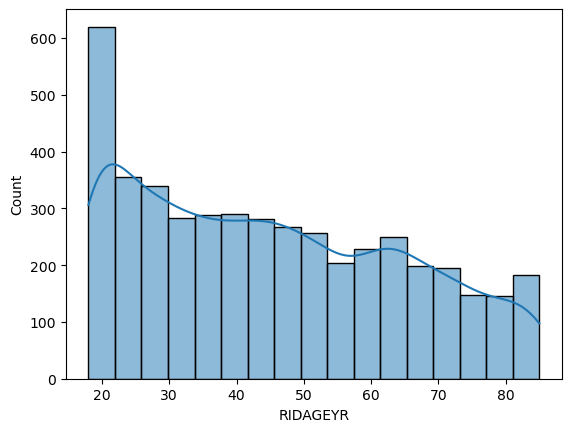

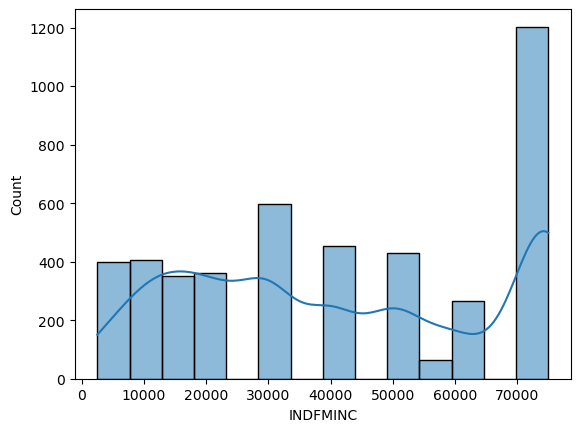

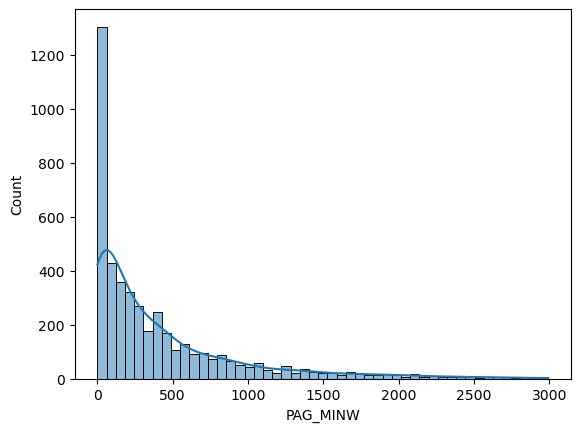

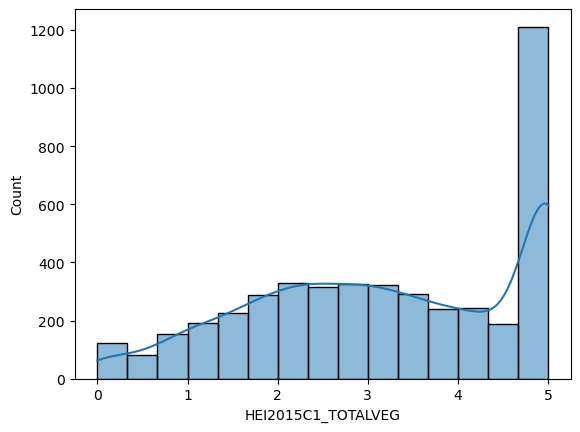

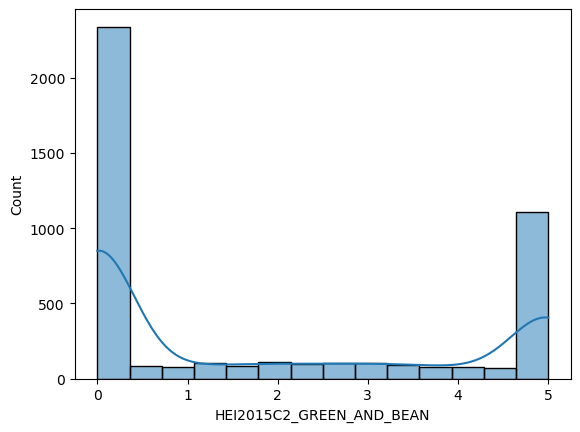

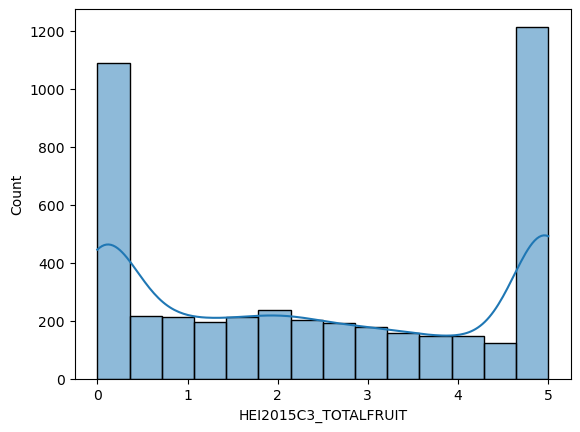

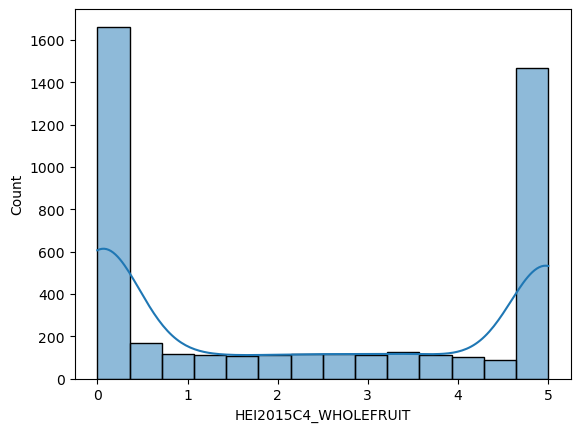

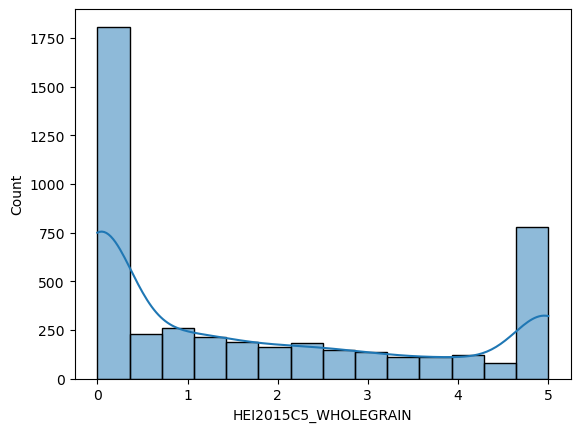

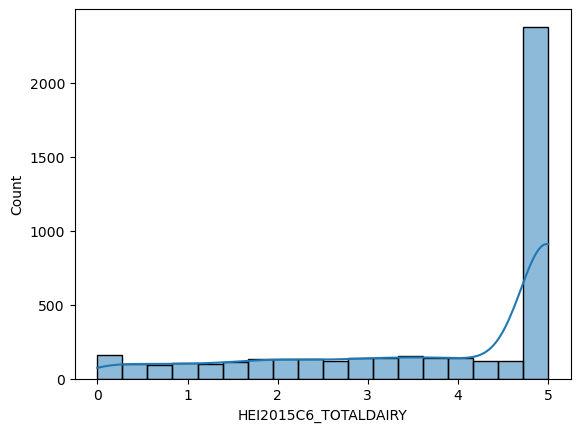

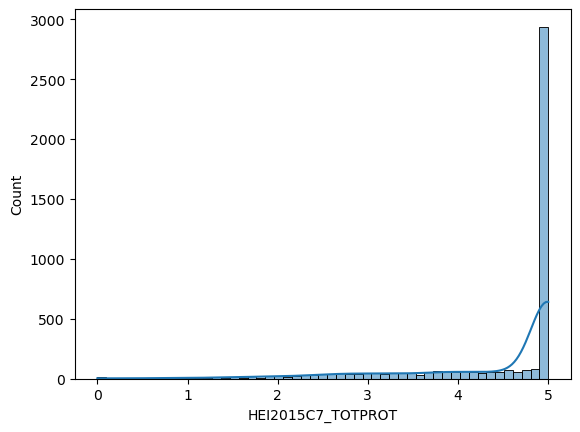

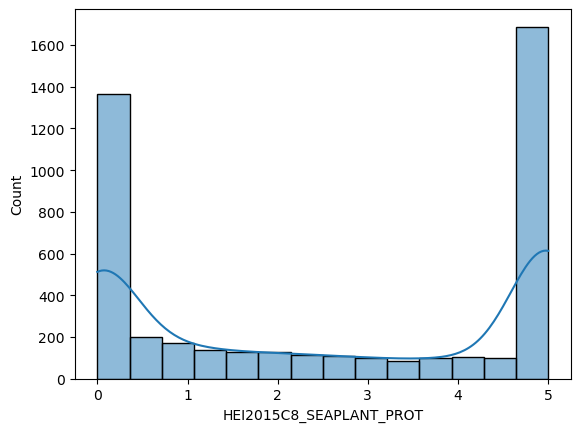

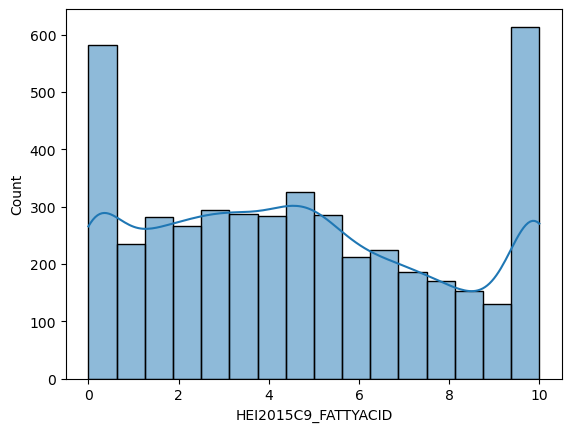

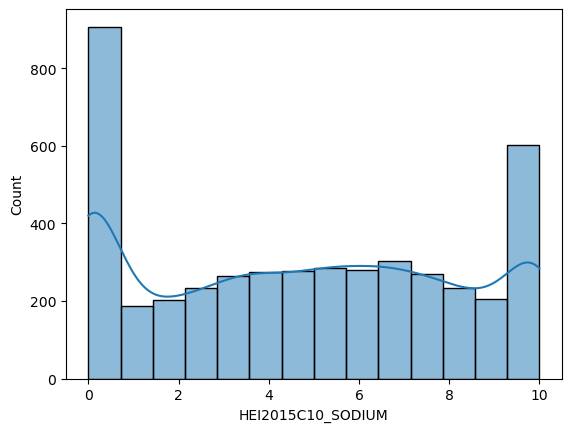

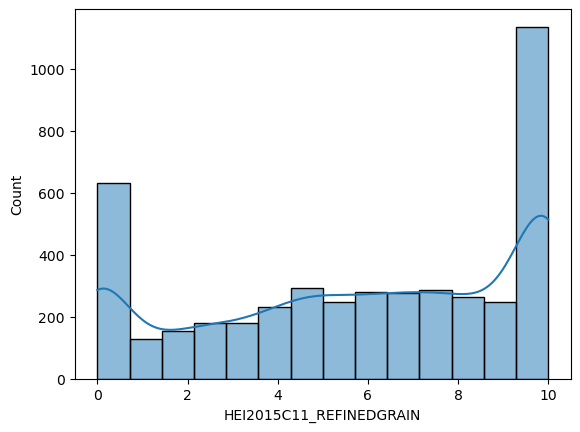

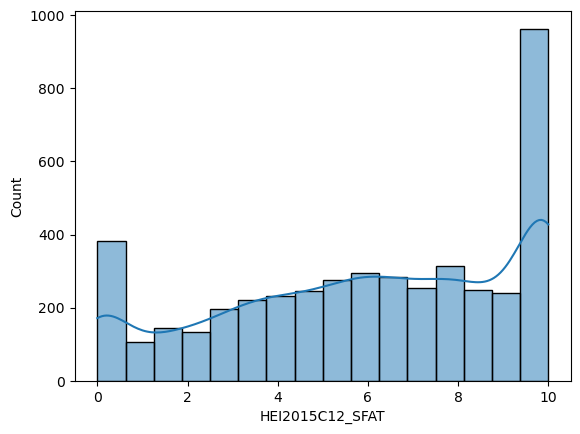

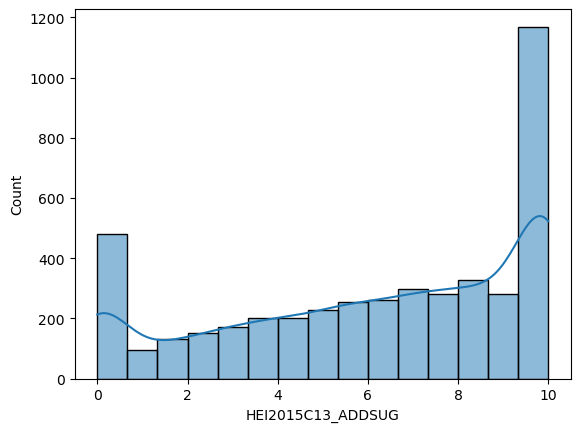

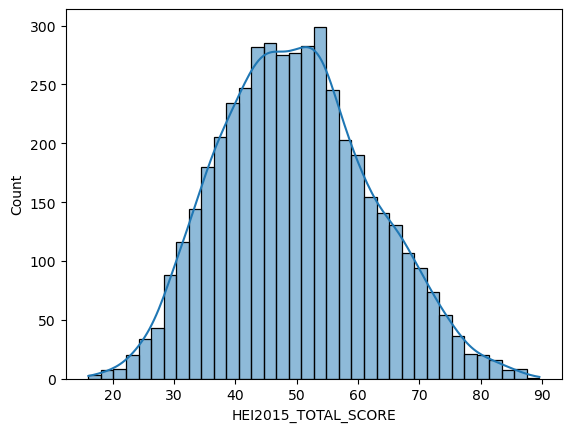

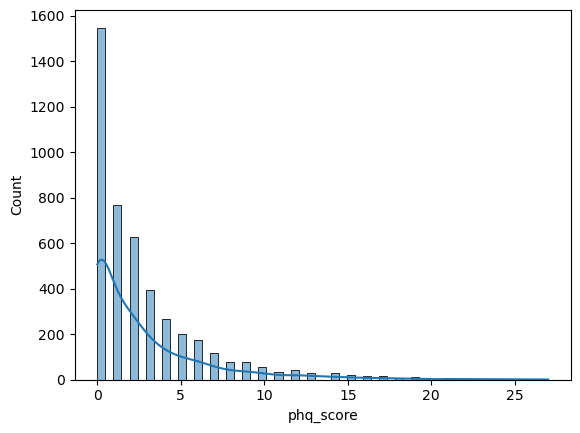

In [64]:
#Um loop criar grafico de histograma para cada variavel numerica (var_num)
for var in var_num:
    sns.histplot(df[var],kde=True)
    plt.show()

# 4. 2 Variaveis Categoricas

In [65]:
df[var_cat]

,RIAGENDR,RIDRETH1,DMDEDUC,ADHERENCE,phq_agrp
1,Feminino,Negro \n não hispânico,Superior \n incompleto,Adequado,Sem Sintomas
2,Masculino,Branco \n não hispânico,Superior \n completo,Acima,Sem Sintomas
3,Masculino,Branco \n não hispânico,Ensino \n médio,Acima,Sem Sintomas
4,Feminino,Outro,Ensino \n médio,Acima,Sem Sintomas
6,Masculino,Outro,Ensino \n médio,Acima,Sem Sintomas
...,...,...,...,...,...
5329,Feminino,Outro,9-12 ano,Baixo,Sem Sintomas
5330,Feminino,Americano Mexicano,< 9 ano,Adequado,Sintomas Moderados
5331,Masculino,Negro \n não hispânico,Superior \n incompleto,Adequado,Sem Sintomas
5332,Masculino,Branco \n não hispânico,Superior \n incompleto,Baixo,Sem Sintomas


In [66]:
def grafico_frequencia(data1,coluna,variavel):
    
    contagem=data1[coluna].value_counts(normalize=True).reset_index()
    contagem.columns=[variavel,'porcentagem']
    sns.barplot(x=variavel,y='porcentagem',data=contagem)
    plt.ylim(0,1)
    plt.show()
    
    

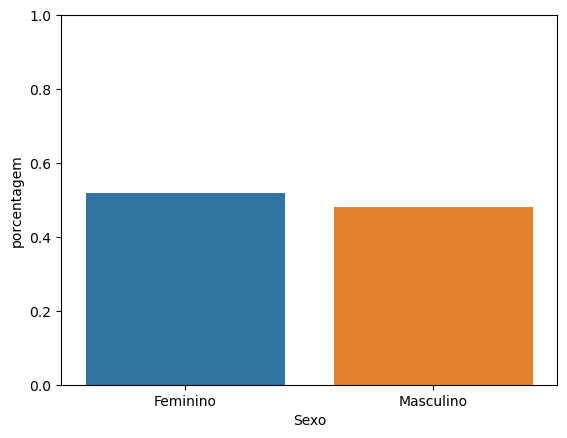

In [67]:
grafico_frequencia(df,'RIAGENDR','Sexo')

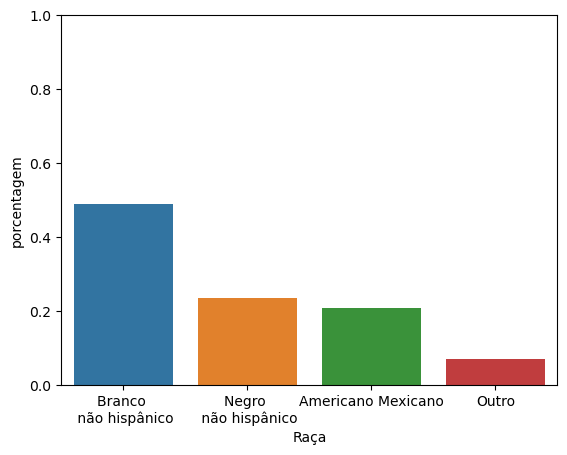

In [68]:
grafico_frequencia(df,'RIDRETH1','Raça')

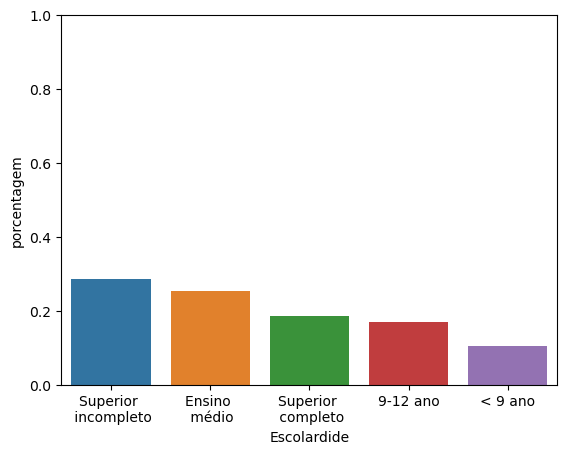

In [69]:
grafico_frequencia(df,'DMDEDUC','Escolardide')

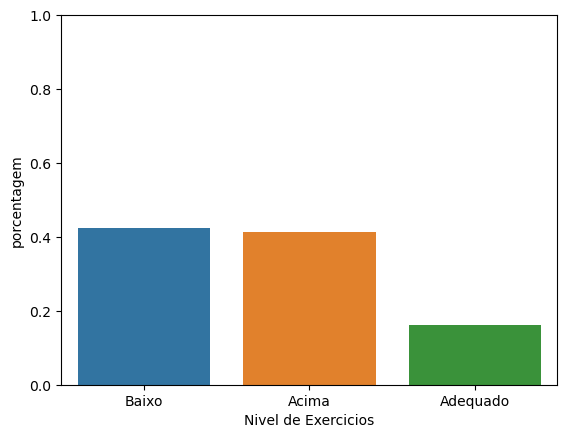

In [70]:
grafico_frequencia(df,'ADHERENCE','Nivel de Exercicios')

#### Como existem pequenas quantidades de sintomas moderados, moderadamentes severes e severos vale a pena juntas os três

In [71]:
df['phq_agrp'].value_counts()

phq_agrp
Sem Sintomas                       3602
Sintomas Leves                      645
Sintomas Moderados                  193
Sintomas Moderadamentes Severes      70
Sintomas Severos                     22
Name: count, dtype: int64

In [72]:
def nova_categoria(valor):
    if valor in ['Sintomas Moderados', 'Sintomas Moderadamentes Severes','Sintomas Severos']:
        return 'Sintomas Moderados-Severos'
    else:
        return valor

df['phq_agrp'] = df['phq_agrp'].apply(nova_categoria)
df['phq_agrp'].value_counts()

phq_agrp
Sem Sintomas                  3602
Sintomas Leves                 645
Sintomas Moderados-Severos     285
Name: count, dtype: int64

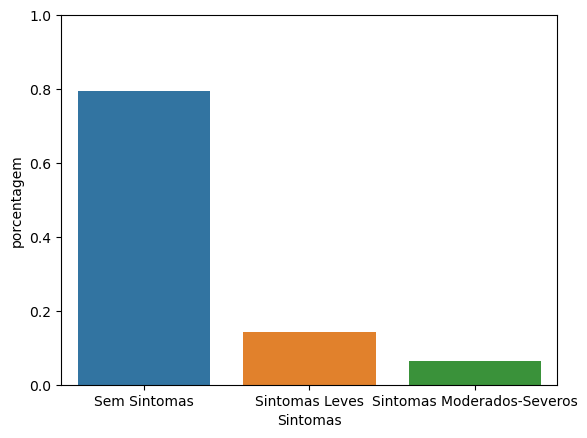

In [73]:
grafico_frequencia(df,'phq_agrp','Sintomas')

# 5. Analise BIVARIADA


In [74]:
var_quali = ["RIAGENDR", "RIDRETH1", "DMDEDUC", "ADHERENCE"]

var_quanti = ["RIDAGEYR", "INDFMINC",
              "PAG_HW", "HEI2015C1_TOTALVEG",
              "HEI2015C2_GREEN_AND_BEAN",
              "HEI2015C3_TOTALFRUIT",
              "HEI2015C4_WHOLEFRUIT",
              "HEI2015C5_WHOLEGRAIN",
              "HEI2015C6_TOTALDAIRY",
              "HEI2015C7_TOTPROT",
              "HEI2015C8_SEAPLANT_PROT",
              "HEI2015C9_FATTYACID",
              "HEI2015C10_SODIUM",
              "HEI2015C11_REFINEDGRAIN",
              "HEI2015C12_SFAT",
              "HEI2015C13_ADDSUG",
              "HEI2015_TOTAL_SCORE"]

In [75]:
def grafico_boxplot_grp(data, variable, label):

    if label == "": 
        label = variable
    
    
    sns.boxplot(x="phq_agrp", y=variable, data=data)
    plt.ylabel(label)
    plt.show()

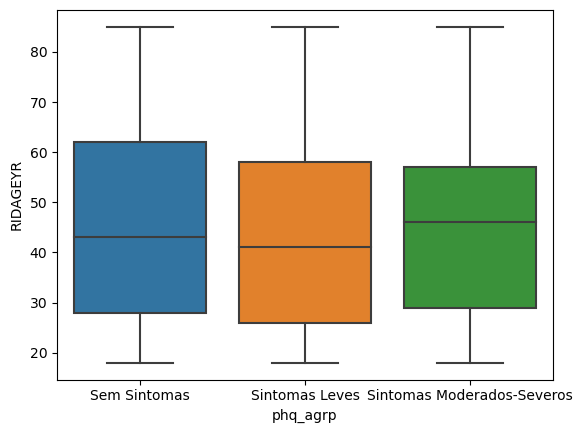

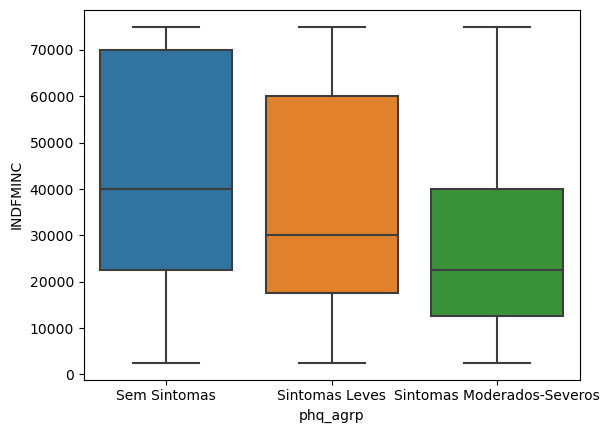

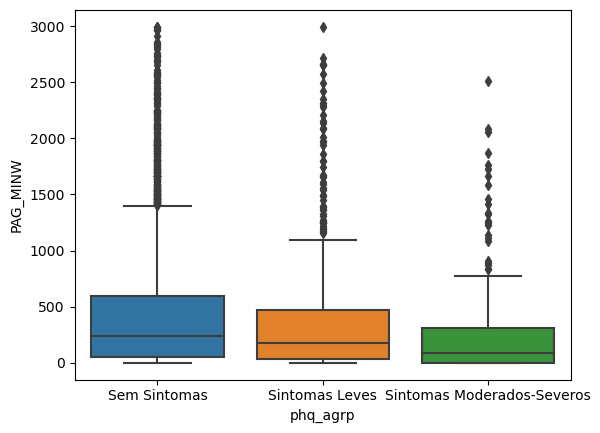

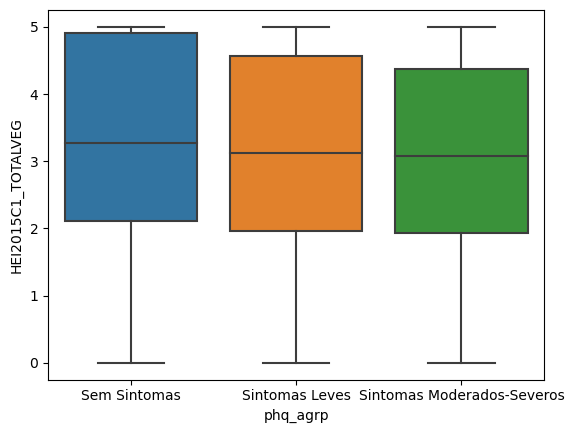

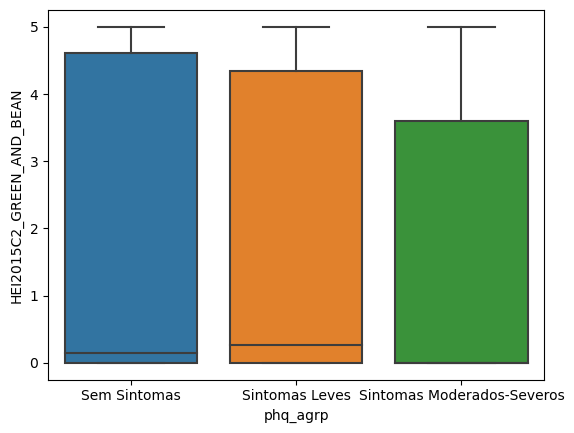

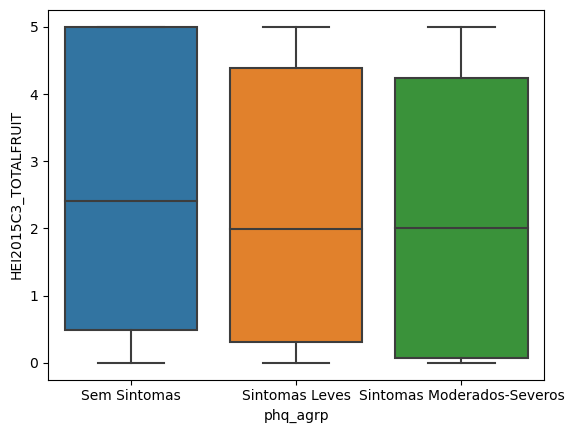

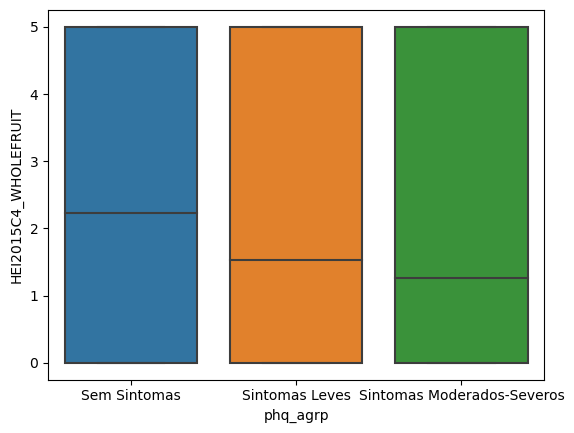

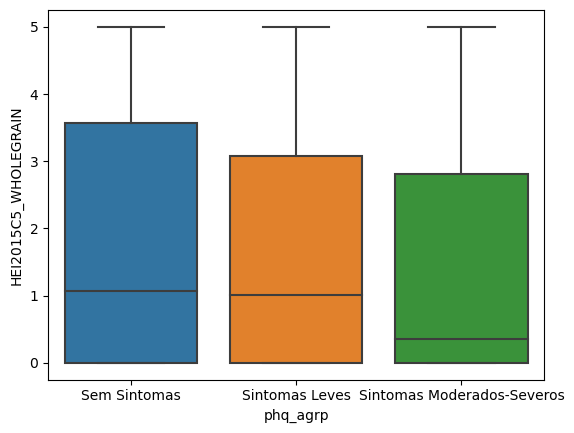

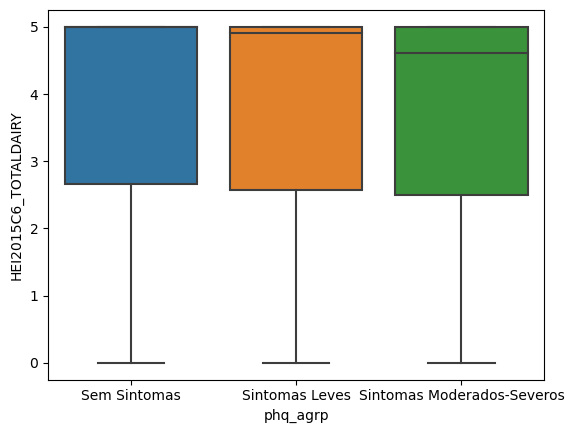

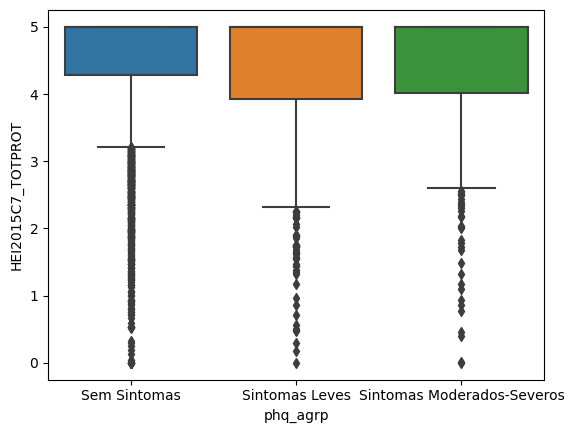

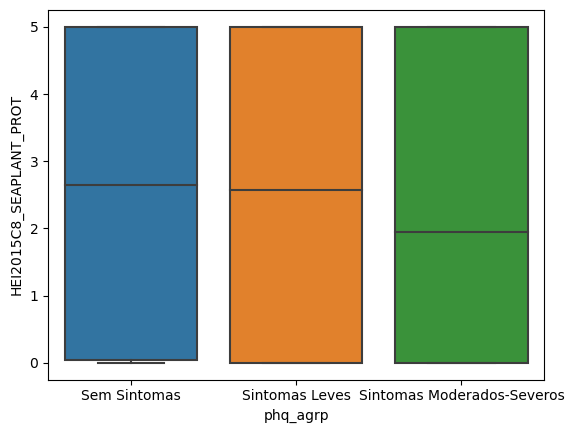

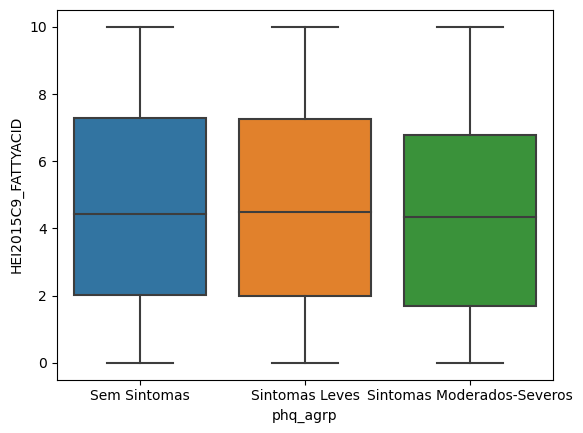

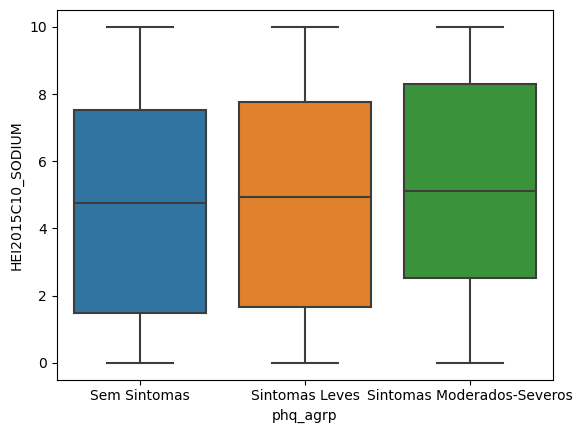

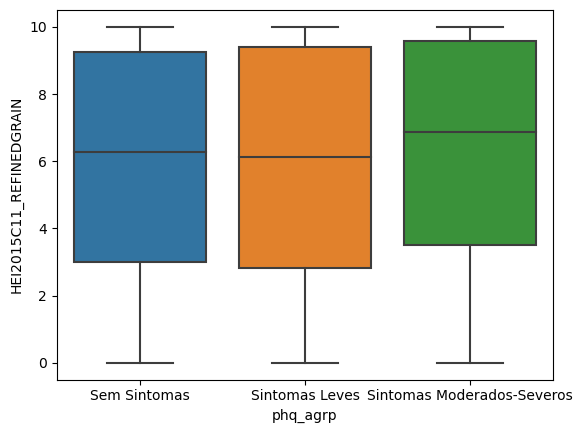

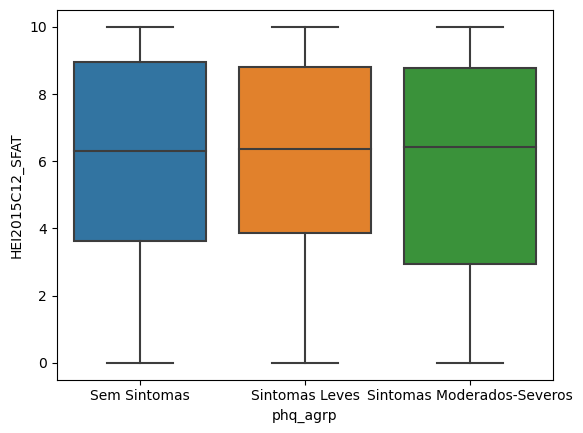

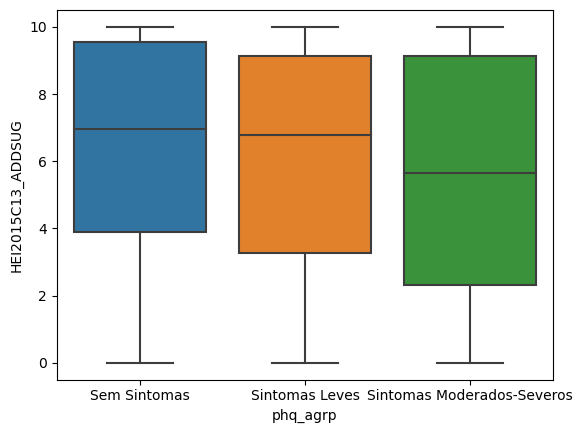

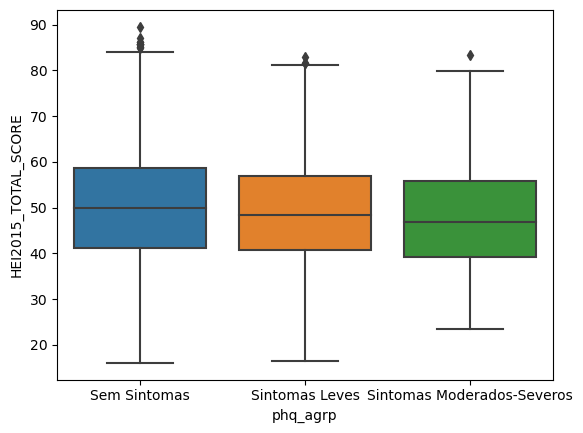

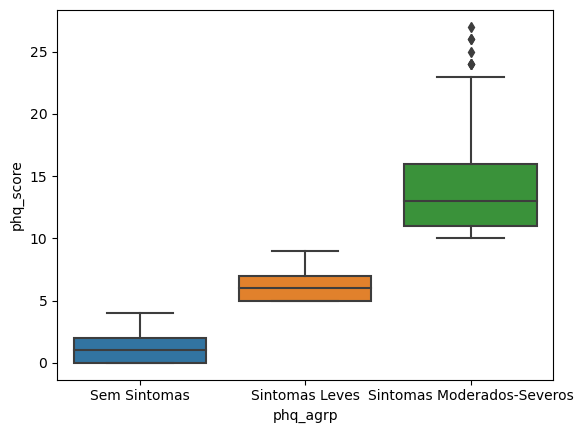

In [76]:
for var in var_num:
    grafico_boxplot_grp(df,var,'')
    

In [77]:
def grafico_barras_prop_grp(data, variable):
    (data
     .groupby(variable)['phq_agrp']
     .value_counts(normalize = True, sort = False)
     .rename("Proporção")
     .reset_index()
     .pipe(sns.catplot, x=variable, y="Proporção", hue = 'phq_agrp', kind="bar"))
    plt.ylim(0,1)
    plt.show()

In [78]:
var_cat=['RIAGENDR', 'RIDRETH1', 'DMDEDUC', 'ADHERENCE',]

C:\Users\Gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


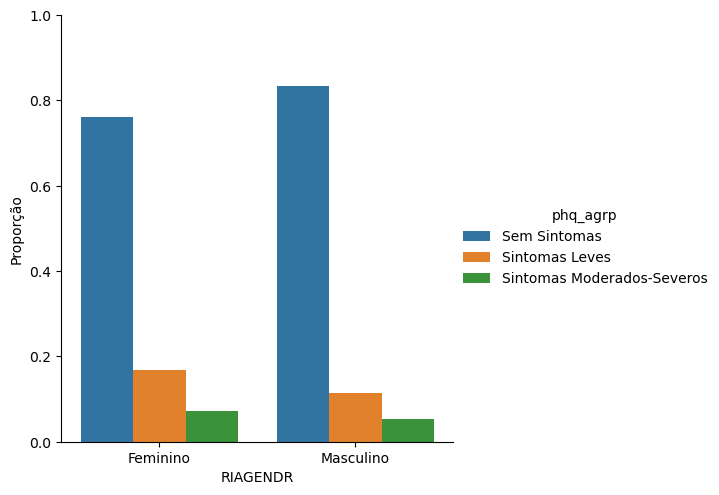

C:\Users\Gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


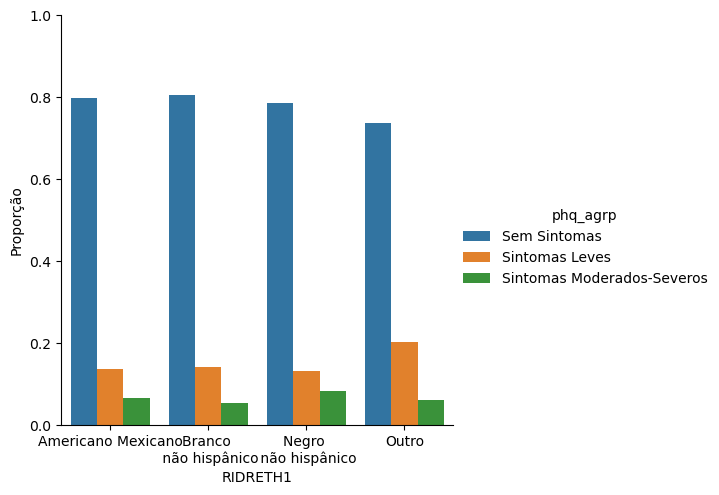

C:\Users\Gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


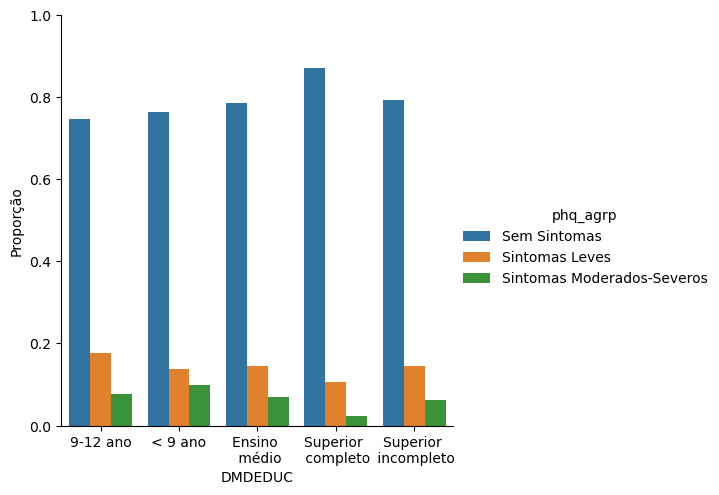

C:\Users\Gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


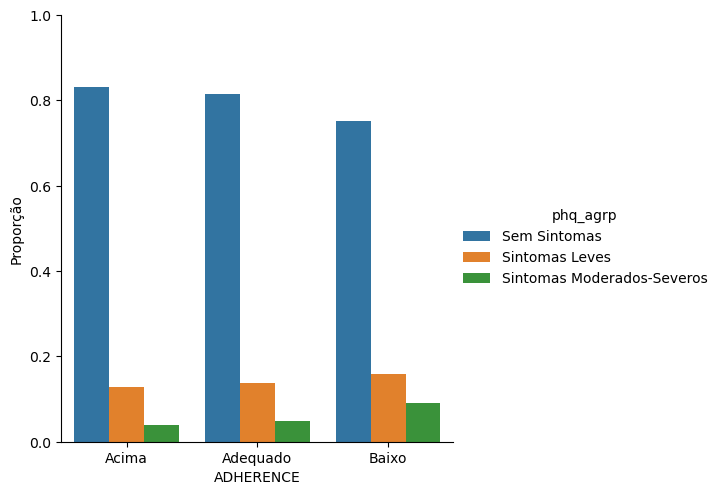

In [79]:
for var in var_cat:
    grafico_barras_prop_grp(df, var)

# 6. Teste de Hipotese <br>
 
## Há associação entre gênero e depressão?

C:\Users\Gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


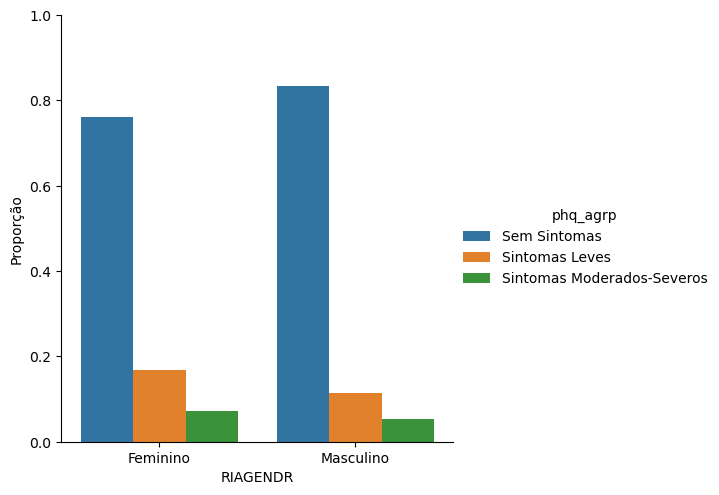

In [80]:
grafico_barras_prop_grp(df, 'RIAGENDR')

Neste caso queremos comparar as proporções (prevalências) de sintomas de depressão entre os gêneros.<br>Como queremos avaliar a associação entre duas variáveis categóricas, usaremos o teste qui-quadrado.

As hipóteses desse teste serão:

H0 (nula) = Não há associação entre gênero e sintomas de depressão. -> p > 0,05 <br>
H1 (alternativa) = Há associação entre gênero e sintomas de depressão. -> p < 0,05

In [81]:
100*pd.crosstab(df['RIAGENDR'],
                df['phq_agrp'],
                normalize='index')

phq_agrp,Sem Sintomas,Sintomas Leves,Sintomas Moderados-Severos
RIAGENDR,,,
Feminino,75.986423,16.801018,7.212558
Masculino,83.264368,11.448276,5.287356


In [82]:
crosstab = pd.crosstab(df['RIAGENDR'],
                       df['phq_agrp'])
crosstab

phq_agrp,Sem Sintomas,Sintomas Leves,Sintomas Moderados-Severos
RIAGENDR,,,
Feminino,1791,396,170
Masculino,1811,249,115


#### Aplicamos então um teste qui-quadrado : 
##### Esse teste é uma técnica estatística que pode ser usada para determinar se existe uma associação significativa entre duas variáveis categóricas em uma tabela de contingência (também conhecida como tabela cruzada ou crosstab).

In [83]:
from scipy.stats import chi2_contingency

stat, p, df1,expected = chi2_contingency(crosstab)
print('stat = %.3f, p = %.3f' % (stat, p))

stat = 36.978, p = 0.000


Um valor de p < 0.001, ou seja ha associação entre genero e depressao

o que da para verificar pelo dados que existem um quantidade maiores de pessoas do sexo feminino com sintomas depressivos

# 7. As médias de idade são as mesmas para os três grupos de depressão?

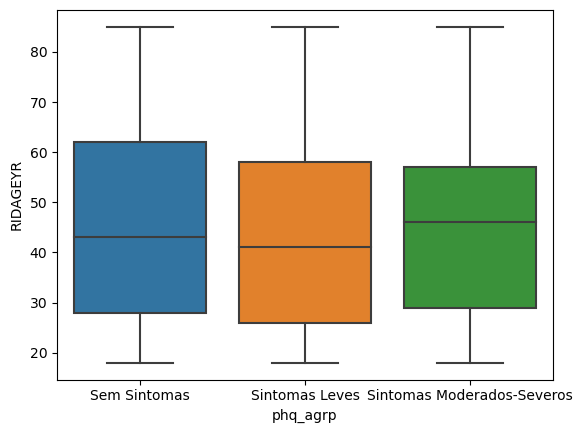

In [84]:
grafico_boxplot_grp(df,'RIDAGEYR','')

##### Teste de Hipótese do tipo ANOVA, comparação de media entre mais de 2 variaveis (três grupos)

##### H0 (nula) = Não existe diferença entre os grupos de depressão com relação à média de idade. -> p > 0,05

##### H1 (alternativa) = Existe pelo menos uma diferença na média de idade entre os grupos de sintomas de depressão. -> p < 0,05


In [85]:
from scipy.stats import f_oneway

df_aux = df[["phq_agrp","RIDAGEYR"]].dropna()

stat, p = f_oneway(df_aux[(df_aux.phq_agrp == "Sem Sintomas")]["RIDAGEYR"],
                   df_aux[(df_aux.phq_agrp == "Sintomas Leves")]["RIDAGEYR"],
                   df_aux[(df_aux.phq_agrp == "Sintomas Moderados-Severos")]["RIDAGEYR"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=2.329, p=0.097


##### Sendo assim, não conseguimos detectar uma diferença estatisticamente significativa entre os grupos de depressão com relação à media de idade.

# 8. As médias de renda familiar são as mesmas para os três grupos de depressão?

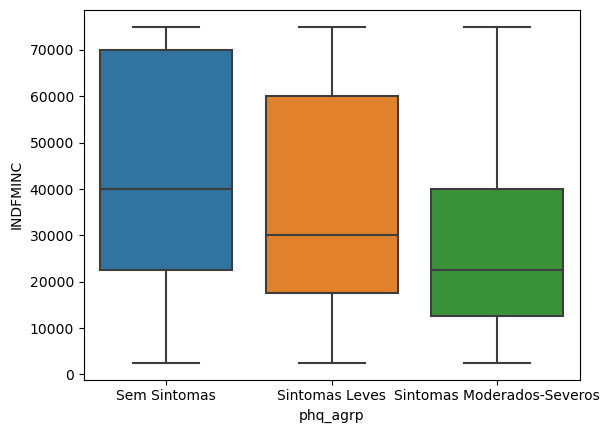

In [86]:
grafico_boxplot_grp(df,"INDFMINC", "")


##### As hipóteses desse teste serão:

##### H0 (nula) = Não existe diferença entre os grupos de depressão com relação à média de renda familiar.

##### H1 (alternativa) = Existe pelo menos uma diferença na média de renda familiar entre os grupos de sintomas de depressão.


In [87]:
df_aux = df[["phq_agrp", "INDFMINC"]].dropna()

stat, p = f_oneway(df_aux[(df_aux.phq_agrp == "Sem Sintomas")]["INDFMINC"],
                   df_aux[(df_aux.phq_agrp == "Sintomas Leves")]["INDFMINC"],
                   df_aux[(df_aux.phq_agrp == "Sintomas Moderados-Severos")]["INDFMINC"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=49.160, p=0.000


In [88]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

label = {"phq_agrp":
         {"Sem Sintomas": "Sem Sintomas",
          "Sintomas Leves": "Sintomas Leves",
          "Sintomas Moderados-Severos": "Sintomas Moderados-Severos"}}

df_aux = df_aux.replace(label)

tukey = pairwise_tukeyhsd(df_aux["INDFMINC"],
                  df_aux['phq_agrp'],
                  alpha = 0.05)

print(tukey)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
    group1               group2             meandiff  p-adj    lower       upper    reject
------------------------------------------------------------------------------------------
  Sem Sintomas             Sintomas Leves  -4901.3718   0.0  -7315.3387  -2487.4048   True
  Sem Sintomas Sintomas Moderados-Severos -13562.1531   0.0 -17036.3537 -10087.9526   True
Sintomas Leves Sintomas Moderados-Severos  -8660.7814   0.0 -12676.6647  -4644.8981   True
------------------------------------------------------------------------------------------


##### Com as comparações múltiplas, estamos realizando três testes de hipótese simultaneamente. Por conta disso, a função ajusta o valor-p para que o erro máximo desde conjunto de teste de hipóteses seja no máximo alpha = 0.05.

##### Teste 1: Grupo 0 (Sem sintomas) x Grupo 1 (sintomas leves) -> p = 0.001

##### Teste 2: Grupo 0 (Sem sintomas) x Grupo 2 (sintomas moderados-severos) -> p = 0.001

##### Teste 3: Grupo 1 (sintomas leves) x Grupo 2 (sintomas moderados-severos) -> p = 0.001

##### Neste caso, rejeitamos todas as hipóteses nulas. Sendo assim, temos indícios de que:

##### A renda média do grupo Sem sintomas é diferente da renda média do grupo de sintomas leves
##### A renda média do grupo Sem sintomas é diferente da renda média do grupo de sintomas moderados-severos
##### A renda média do grupo sintomas leves é diferente da renda média do grupo sintomas moderados-severos